In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
# import numpy as np
from datetime import datetime
#  import os

In [4]:
data = pd.read_csv("../data/UnivClass_Ciara.csv",index_col=0,parse_dates=True)
# data

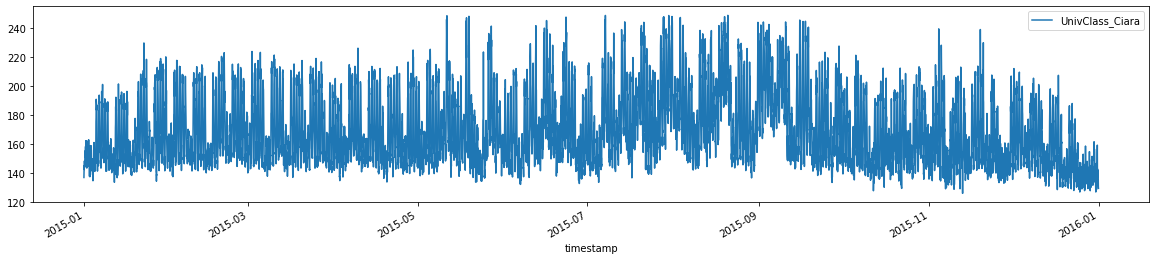

In [5]:
data.plot(figsize=(20,4))



In [7]:
weather = pd.read_csv("../data/weather2.csv",index_col="timestamp",parse_dates=True)
# weather

In [8]:
weather_hourly = weather.resample("H").mean()
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]
weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method="ffill")

In [9]:
temperature = weather_hourly_nooutlier_nogaps["TemperatureC"]

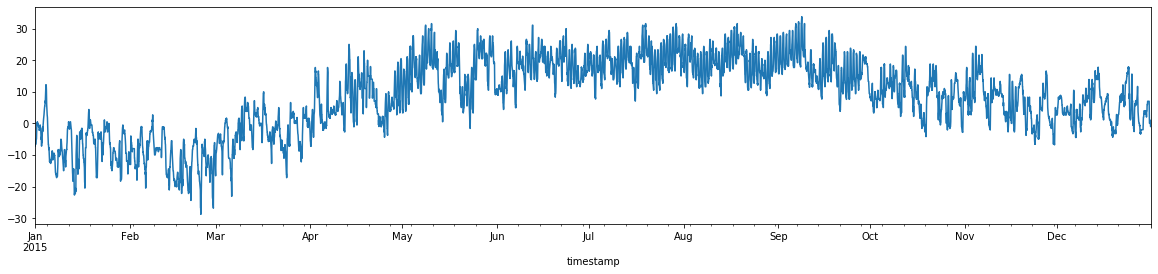

In [10]:
temperature.plot(figsize=(20,4))

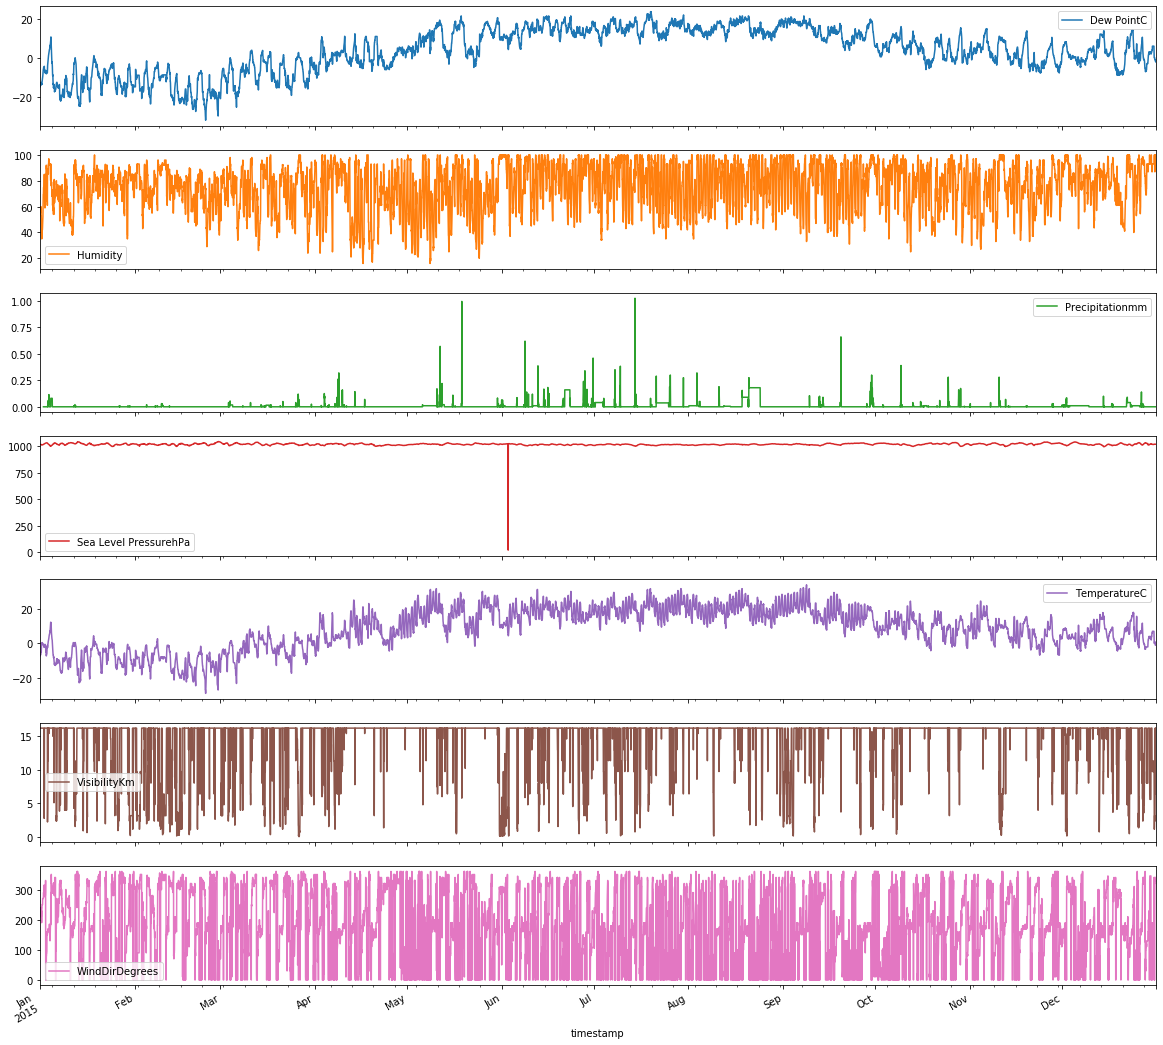

In [13]:
weather_hourly_nooutlier_nogaps.plot(subplots=True,figsize=(20,20));

In [14]:
trainning_months = [4,5,6]
test_month = [6]

In [16]:
trainningdata = data[data.index.month.isin(trainning_months)]
# trainningdata.plot()
testdata = data[data.index.month.isin(test_month)]

In [17]:
trainningdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2015-04-01 00:00:00 to 2015-06-30 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  2184 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [32]:
# pd.DataFrame(temperature[temperature.index.month.isin(trainning_months)].values)

In [29]:
train_features = pd.concat([pd.get_dummies(trainningdata.index.hour),
                           pd.get_dummies(trainningdata.index.dayofweek),
                           pd.DataFrame(temperature[temperature.index.month.isin(trainning_months)].values)], axis=1).dropna()

In [40]:
train_features.shape

(2184, 32)

In [39]:
trainningdata.values.shape

(2184, 1)

In [43]:
model = KNeighborsRegressor().fit(np.array(train_features),np.array(trainningdata.values))

In [44]:
test_features = pd.concat([pd.get_dummies(testdata.index.hour),
                           pd.get_dummies(testdata.index.dayofweek),
                           pd.DataFrame(temperature[temperature.index.month.isin(test_month)].values)], axis=1).dropna()

In [46]:
predictions = model.predict(test_features)

In [48]:
predicted_actual = pd.concat([testdata,pd.DataFrame(predictions,index=testdata.index)],axis=1)

In [50]:
predicted_actual.columns = ["actual","predicted"]

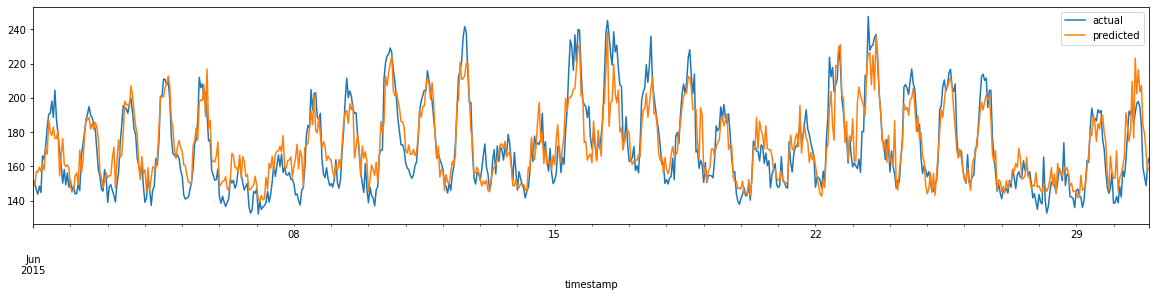

In [52]:
predicted_actual.plot(figsize=(20,4))

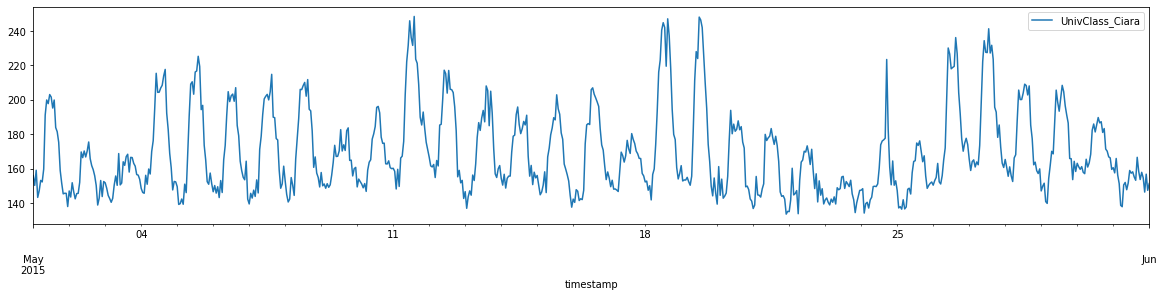

In [59]:
trainningdata.truncate(before="05-01-2015",after="06-01-2015").plot(figsize=(20,4))

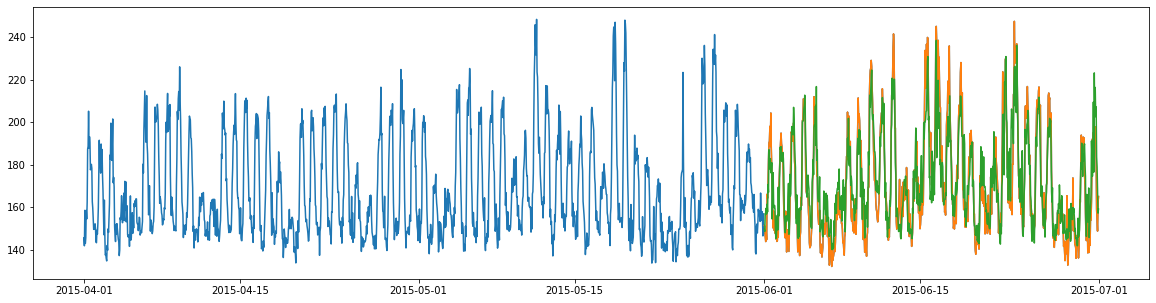

In [62]:
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(trainningdata)
ax.plot(predicted_actual)